## 💻 과제
데이터 전처리 작업을 수행하고 기술통계, 상관관계 분석, 시각화 방법을 통해 데이터에 담겨있는 유의미한 패턴을 발견하여 보고서 제출 (분량 최대 pdf10장)

### 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel("data.xls")

### 1) EDA  
간단하게 데이터의 전체적인 구조와 관계를 파악하였습니다.

In [2]:
# 데이터 개수 확인
print(len(data))

# 데이터프레임 정보 출력
print(data.info())

4669
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_USER         4669 non-null   int64 
 1   USER_STATE      4669 non-null   object
 2   USER_TIMEZONE   4669 non-null   object
 3   ID_HOTEL        4669 non-null   int64 
 4   HOTEL_CITY      4669 non-null   object
 5   HOTEL_STATE     4669 non-null   object
 6   HOTEL_TIMEZONE  4669 non-null   object
 7   Trip Type       4669 non-null   int64 
 8   Rating          4669 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 328.4+ KB
None


주어진 데이터는 4,669개의 고객의 호텔 평가점수 데이터를 담고 있는 데이터이며 .info()를 통해 데이터프레임 정보를 출력해본 결과, 9개의 컬럼으로 구성되어 있음을 확인하였습니다.  

각각 컬럼의 특징을 상세하게 정의하면 다음과 같습니다.  
1. ID_USER (데이터타입 : int) : user_id  
2. USER_STATE (데이터타입 : object) : user가 있는 주 이름  
3. USER_TIMEZONE (데이터타입 : object) : user가 있는 곳의 timezone  
4. ID_HOTEL (데이터타입 : int) : hotel_id  
5. HOTEL_CITY (데이터타입 : object) : hotel이 있는 도시 이름  
6. HOTEL_STATE (데이터타입 : object) : hotel이 있는 주 이름  
7. HOTEL_TIMEZONE (데이터타입 : object) : hotel이 있는 곳의 timezone  
8. Trip Type (데이터타입 : int) : 여행 유형  
9. Rating (데이터타입 : int) : 평가 점수  

In [3]:
#user_id의 유니크값 count
data.ID_USER.nunique()

1202

4,669개의 데이터 중에서 평가를 남긴 user_id의 수는 1,202명이었습니다. 한명의 고객이 여러 호텔에 점수를 부여했음을 알 수 있었습니다.

### 결측치 확인

In [4]:
data.isna().sum()

ID_USER           0
USER_STATE        0
USER_TIMEZONE     0
ID_HOTEL          0
HOTEL_CITY        0
HOTEL_STATE       0
HOTEL_TIMEZONE    0
Trip Type         0
Rating            0
dtype: int64

isna()함수로 데이터의 결측치를 확인해보았습니다.  
결측치는 모든 컬럼에서 없었고 데이터에서 행 삭제를 따로 진행하지 않고 분석을 진행하였습니다.

In [5]:
#각 컬럼별 unique값 확인
print("호텔 개수 :", data.ID_HOTEL.nunique())
print("주 개수 :", data.HOTEL_STATE.nunique())
print("도시 개수 :", data.HOTEL_CITY.nunique())

호텔 개수 : 1890
주 개수 : 27
도시 개수 : 48


Rating 평가 점수를 부여받은 호텔의 개수는 1890개입니다.  
이 호텔들은 27개 주의 48개 도시에 있는 호텔임을 확인할 수 있었습니다.

### 1-1) 상관관계 분석

<AxesSubplot:>

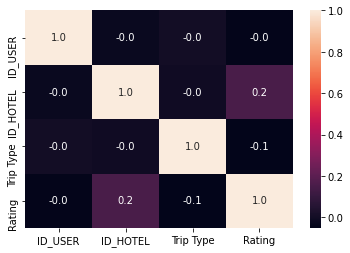

In [6]:
#상관관계 분석
import seaborn as sns

df_cor=data.corr(method='pearson')
sns.heatmap(df_cor, annot=True, fmt='.1f')

상관관계분석을 해보았으나 'ID_USER'은 의미있는 숫자가 아닌 부여된 user_id라는 점, 'ID_HOTEL' 역시 hotel에 부여된 id라는 점, Trip Type은 수치형으로 해석할 것이 아닌 실제로는 범주형(명목형) 변수라는 점을 고려할 때 상관관계 분석에서 추가적으로 의미를 도출할 수 있지는 않았습니다.

### 1-2) Rating(평가 점수) 컬럼 분석

In [7]:
# 평가점수 Rating 컬럼 평균
print("평균 :", round(data['Rating'].mean(), 3))
print("중앙값 :", data['Rating'].median())

평균 : 3.633
중앙값 : 4.0


Rating의 평균은 3.633, 중앙값은 4.0이었습니다. 중앙값이 평균보다 크기때문에 히스토그램이 왼쪽으로 늘어진 형태로 그려질 것으로 예상됩니다.

<BarContainer object of 5 artists>

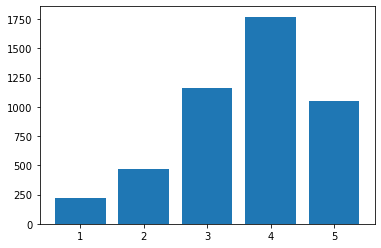

In [8]:
# 평가점수 Rating 시각화
# 패키지 임포트
import matplotlib.pyplot as plt

#막대그래프
plt.bar(data['Rating'].value_counts().index, data['Rating'].value_counts().values)

고객이 평가한 점수 분포를 확인해보고자 Rating 컬럼의 값들을 막대그래프로 시각화해보았습니다.  
  
예상대로 히스토그램이 왼쪽으로 늘어진 형태로 나타났습니다. 4점에 가장 많이 분포를 하고 있으며 불만족에 가까운 1,2점의 리뷰를 남긴 고객도 있었습니다.  
-> 그래프가 아닌 count값으로 자세히 확인해보았습니다.

In [9]:
#Rating 컬럼의 각 값을 count해줌
count=pd.DataFrame(data.Rating.value_counts())

#%로 계산
count["%"]=round(count['Rating']/sum(count.Rating)*100, 2)

#print
count

,Rating,%
4,1771,37.93
3,1163,24.91
5,1046,22.40
2,470,10.07
1,219,4.69


5점을 남긴 고객보다 3-4점을 부여한 고객이 더 많았습니다.

### 1-3) Trip Type(여행 유형) 컬럼 분석

<BarContainer object of 5 artists>

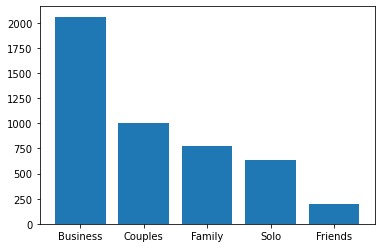

In [10]:
#여행 유형 Trip Type 시각화
#1:Family, 2:couples, 3:Busienss, 4:Solo, 5:Friends

#가장 높은 순서 3->2->1->4->5
#Bussiness->Couples->Family->Solo->Friends 순서로 인덱스

#막대그래프
plt.bar(['Business', 'Couples', 'Family', 'Solo', 'Friends'], data['Trip Type'].value_counts().values)

여행의 유형은 Business 목적의 여행유형이 가장 많았고 Couple, Family 순으로 이어졌습니다. 친구와 함께 여행을 오는 목적의 리뷰가 가장 적은 것을 확인할 수 있었습니다.

### 1-4) HOTEL_STATE(hter이 있는 주이름) 컬럼 분석

In [11]:
# HOTEL_STATE 호텔이 있는 주 파악
state_cnt=pd.DataFrame(data.HOTEL_STATE.value_counts())
state_cnt.columns=["count"]

#%로 계산
state_cnt["%"]=round(state_cnt['count']/state_cnt['count'].sum()*100, 2)

#print
state_cnt

,count,%
TX,1171,25.08
CA,522,11.18
AZ,369,7.90
OK,291,6.23
NC,235,5.03
TN,229,4.90
OH,220,4.71
NM,211,4.52
IN,187,4.01
GA,164,3.51


고객이 평점을 남긴 호텔의 주를 분석해보니 TX(텍사스주)가 25.08%로 가장 많았고 CA(캘리포니아주)가 11.18%, AZ(애리조나주) 7.9% 순서였습니다.   
MA(매사추세츠)주는 평가 건수가 9건으로 전체 행수중 가작 적은 0.19% 비율을 차지하고 있음을 확인할 수 있었습니다. 모든 주에서 많은 평가를 남긴 것은 아닌 것으로 보입니다.

### 1-5) 유저별 호텔 평가 개수 확인

In [12]:
#계산방법 : data.groupby("ID_USER").count()['ID_HOTEL']
#-> ID_USER 별로 group을 나눈 후 각 행개수를 count 해주었습니다.

count=pd.DataFrame(data.groupby("ID_USER").count()['ID_HOTEL'])

#컬럼의 의미가 달라 컬럼명을 변경해주었습니다. (ID_HOTEL->count)
count.columns=['count']

#print
count.sort_values(by='count', ascending=False)
# sort_values(by='컬럼명') : 정렬
# 옵션 : ascending=False -> 내림차순 정렬

,count
ID_USER,
27783,19
13087,16
40423,16
17535,12
49098,12
...,...
14560,3
37852,3
37862,3


1202명의 유저가 남긴 평가의 개수를 count해보았습니다. 내림차순 정렬을 해보았을 때 호텔 평가를 3개만 남긴 유저부터 19개를 남긴 유저까지 다양하게 분포하고 있음을 확인할 수 있었습니다.

### 1-6) 지역별 호텔 평가 비교  
각 주의 호텔 평가 점수를 비교하여, 어느 주의 호텔이 가장 좋은 평가를 받았는지 확인

In [13]:
#주별, 호텔 평균 평점 계산
state_avg=pd.DataFrame(data.groupby('HOTEL_STATE').mean()['Rating'])

#내림차순 정렬
state_avg=state_avg.sort_values(by='Rating', ascending=False)

#좋은 평가를 받은 상위 10개주 추출
state_avg=state_avg.head(10)
state_avg

,Rating
HOTEL_STATE,
MA,4.555556
NY,4.333333
FL,3.817518
MI,3.764706
NE,3.764706
OK,3.759450
IN,3.705882
KS,3.705426
NV,3.696629


좋은 평가를 받은 상위 10개주를 추출했을 때, MA(매샤추세츠), NY(뉴욕), FL(플로리다) 순서로 좋은 평가를 받을 것을 확인할 수 있었습니다.  
  
MA주의 호텔이 좋은 평가를 받긴 했지만, 전체 데이터 중 MA주의 호텔의 평가 건수는 가장 적은 9건이였으므로 건수가 작아서 점수가 상대적으로 높게 평가된 것으로 생각됩니다.  
   
-> 점수의 차이를 한눈에 확인하기 위해 위의 표를 시각화해보았습니다.

<BarContainer object of 10 artists>

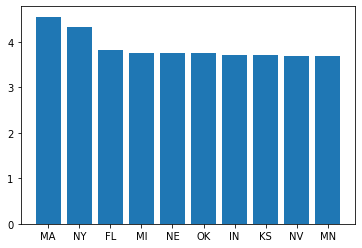

In [14]:
#막대그래프
plt.bar(state_avg['Rating'].index, state_avg['Rating'].values)

시각화 결과, MA(메샤추세츠) 주의 평균 평점이 다른주와 비교하였을때 상대적으로 높은 양상을 보임을 한눈에 확인할 수 있었습니다. 

### 1-7) 여행 유형(trip_type)에 따른 호텔 선호도  
여행 유형(가족 여행, 출장 등)에 따른 호텔 평가 점수를 비교하여, 어떤 여행 유형의 사용자들이 호텔을 더 선호하는지 확인할 수 있습니다.

In [15]:
#여행 유형별, 호텔 평균 평점 계산
type_avg=pd.DataFrame(data.groupby('Trip Type').mean()['Rating'])

#내림차순 정렬
type_avg=type_avg.sort_values(by='Rating', ascending=False)

#trip_type 상세 설명컬럼 추가
type_avg['type']=['Couples', 'Family', 'Friends', 'Solo', 'Business']

#인덱스를 상세 type컬럼으로 대체해줌
type_avg.set_index("type", inplace=True)
type_avg

,Rating
type,
Couples,3.743284
Family,3.708171
Friends,3.607143
Solo,3.590551
Business,3.566440


"Couples" 유형의 사용자들이 호텔을 가장 좋게 선호하고 있는 것을 확인할 수 있습니다. "Family", "Friends"인 경우가 그 다음 순서를 이었습니다.

### 💡컬럼 전처리 후, 세부 분석 - 유의미한 패턴을 발견  
- 세부분석 1) TX(텍사스) 주의 비즈니스 목적으로 여행을할 때, 어떤 호텔을 방문해야할까요?  
  
고객이 가장 많은 평점을 남긴 주인 TX(텍사스주)를 가지고 상세 분석을 진행해보았습니다.

In [16]:
#텍사스주 데이터만 따로 저장
tx=data[data['HOTEL_STATE']=='TX']

#경고코드 발생으로 데이터프레임 copy해줌
tx=tx.copy()

In [17]:
# 전처리) USER_STATE, USER_TIMEZONE, HOTEL_TIMEZONE은 분석에 필요하지 않은 컬럼이라고 생각하여 삭제를 진행하였습니다.
#tx 데이터프레임은 HOTEL_STATE값이 모두 TX이므로 HOTEL_STATE 컬럼 삭제

tx.drop(columns=['USER_STATE', 'USER_TIMEZONE', 'HOTEL_TIMEZONE', 'HOTEL_STATE'], inplace=True)

tx.head(10)

,ID_USER,ID_HOTEL,HOTEL_CITY,Trip Type,Rating
1,45,223229,SanAntonio,3,5
3,45,98827,ELPaso,3,5
4,45,99518,SanAntonio,3,3
6,64,1751886,Austin,3,4
7,64,99120,Houston,3,4
10,100,109399,Dallas,3,3
15,159,98815,ELPaso,1,3
16,159,99055,Houston,2,4
21,198,240001,ELPaso,3,4
23,215,109010,Austin,3,4


-> 어떤 호텔의 평점이 가장 좋았는지 상위 평가를 받은 호텔을 추출해보고자 합니다.  
여행의 유형이 Business인 경우가 가장 많았으므로 Business일 경우를 가정해서 상위 점수 호텔을 추출해보았습니다. 

In [18]:
#trip type이 business인 경우 저장
tx_business=tx[tx['Trip Type']==3]

#평가 개수
print("평가 개수 :", len(tx_business))

#평가한 고객의 수
print("평가 고객수 :", tx_business.ID_USER.nunique())

#평가받은 호텔 수
print("호텔 수 :", tx_business.ID_HOTEL.nunique())

평가 개수 : 553
평가 고객수 : 305
호텔 수 : 308


305명의 고객이 308개의 호텔에 대해 553개의 평가를 남긴 것을 확인하였고 호텔 별 평균 평점을 확인해보았습니다.

In [19]:
# 계산방법 : tx_business.groupby("ID_HOTEL").mean()["Rating"]
# -> "ID_HOTEL"을 기준으로 groupby를 사용해서 그룹을 나눈 후, mean()함수를 사용해서 Rating 컬럼의 평균을 구해주었다.
rating=pd.DataFrame(tx_business.groupby("ID_HOTEL").mean()["Rating"])

#오름차순 정렬
rating.sort_values(by=['Rating'], ascending=False, inplace=True)

#확인
len(rating[rating['Rating']==5])

38

308개의 호텔 중, 38개의 호텔이 평균 평점 5점을 받은 호텔이라는 것을 확인하였습니다. 텍사스주에서 비즈니스 목적으로 여행을 하실 때, 38개의 상위 평점 호텔을 고려해보시는 것이 좋을 것으로 판단됩니다.

다음은 텍사스주의 비즈니스 목적 카테고리의 평균 평점 5점을 받은 38개의 호텔의 목록입니다.

In [20]:
rating[rating['Rating']==5].reset_index()['ID_HOTEL']

0      225034
1       99450
2      247108
3      223058
4      223045
5     1465226
6      217732
7     1382444
8     1235675
9      109347
10    1199983
11     109231
12     530458
13    1493264
14     107844
15     107915
16     107956
17     107957
18     577395
19     108010
20     108980
21     676704
22     676703
23     108945
24     223229
25     483873
26      98804
27     223680
28     225027
29     224218
30      98435
31    1878688
32      98629
33    1845655
34     223695
35     225035
36    1514287
37     223620
Name: ID_HOTEL, dtype: int64

- 세부분석 2)  
전체 주에서 가장 많은 평가를 받은 호텔은 어디일까요?

In [21]:
#계산방법 : data.groupby("ID_HOTEL").count()['ID_USER']
#-> ID_HOTEL 별로 group을 나눈 후 각 행개수를 count 해주었습니다.

count=pd.DataFrame(data.groupby("ID_HOTEL").count()['ID_USER'])


#컬럼의 의미가 달라 컬럼명을 변경해주었습니다. (ID_USER->count)
count.columns=['count']

#print, 상위 5개 호텔
count.sort_values(by='count', ascending=False).head(5)
# sort_values(by='컬럼명') : 정렬
# 옵션 : ascending=False -> 내림차순 정렬

,count
ID_HOTEL,
100603,13
86320,12
98117,12
224241,12
98197,12


가장 많은 평가를 받은 호텔은 "ID_HOTEL"=100603이 13회로 고객으로부터 가장 많은 평가를 받은 호텔이였습니다. 그럼 과연 이 호텔은 좋은 평가를 받았을까요?

In [22]:
#'ID_HOTEL'이 100603인 호텔 데이터 조회
best=data[data['ID_HOTEL']==100603]
best

,ID_USER,USER_STATE,USER_TIMEZONE,ID_HOTEL,HOTEL_CITY,HOTEL_STATE,HOTEL_TIMEZONE,Trip Type,Rating
135,2019,OH,Eastern,100603,Seattle,WA,Pacific,2,3
247,4122,MA,Eastern,100603,Seattle,WA,Pacific,3,3
803,11490,DC,Eastern,100603,Seattle,WA,Pacific,3,3
875,12462,IL,Central,100603,Seattle,WA,Pacific,3,2
1727,24202,VA,Eastern,100603,Seattle,WA,Pacific,3,4
2276,31742,TX,Central,100603,Seattle,WA,Pacific,3,4
2414,33899,IL,Central,100603,Seattle,WA,Pacific,3,3
2483,34915,AK,AK,100603,Seattle,WA,Pacific,2,4
2687,37181,VA,Eastern,100603,Seattle,WA,Pacific,2,4
2917,40423,MN,Central,100603,Seattle,WA,Pacific,3,2


미국 WA(워싱턴주) 시애틀에 있는 이 호텔은 고객으로부터 가장 많은 평가를 받은 호텔이지만 Rating을 보면 좋은 평가를 받았는지는 한눈에 들어오지 않았습니다. Trip Type(여행 유형)에 따라서 그룹을 나눠 Rating 평균을 구해보았습니다

In [23]:
best.groupby("Trip Type").mean()['Rating']

Trip Type
2    4.00
3    3.25
4    3.00
Name: Rating, dtype: float64

여행의 목적이 Couple인 고객들의 평균 평점은 4점으로 가장 높았고 Business인 고객들의 평균평점은 3.25, Solo trable인 경우에는 3점의 결과가 나왔습니다. 이 호텔은 Business 목적의 방문이 가장 많은만큼 business 목적으로 방문하는 고객의 니즈를 잘 충족시킬 수 있도록 호텔을 보완해야할 필요도 있어보입니다.

분석은 여기까지입니다:) 감사합니다